In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('C:/Users/ashis/OneDrive/Desktop/Machine Learning/Mobile.csv')
#print(df)

#df.info() # columns info
#df.isnull().sum() # null values count
#df.duplicated().sum() # duplicate values count

X = df.drop('price_range',axis=1)
y = df['price_range']
df.drop('price_range',axis=1, inplace= True)
scaler = MinMaxScaler((0,1))
X=scaler.fit_transform(X)

# Feature Selection using variance Threshold
from sklearn.feature_selection import VarianceThreshold
print("Variance Threshold")
variance = VarianceThreshold()
Xt = variance.fit_transform(X)
gnb = GaussianNB()

result = []
for i in range(0,Xt.shape[1]):
    X_train, X_test, y_train, y_test = train_test_split(Xt[:,:i+1], y, test_size=0.2,random_state=0)
    model= gnb.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred) * 100
    print(f'Accuracy with k{i+1} : {test_accuracy}')
    result.append({'Features Count': i+1, 'Variance Threshold': '{:.2f}'.format(test_accuracy)})
print()

# Feature Selection using SelectKBest f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
print("SelectKBest f_classif")

for i in range(0,X.shape[1]):
    selectkbest_f = SelectKBest(score_func = f_classif, k=i+1)
    Xt = selectkbest_f.fit_transform(X,y)
    X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.2,random_state=0)
    model= gnb.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred) * 100
    print(f'Accuracy with k{i+1} : {test_accuracy}')
    result[i]['SelectKBest f_classif'] = '{:.2f}'.format(test_accuracy)
print()

# Feature Selection using SelectKBest mutual_info_classif
from sklearn.feature_selection import mutual_info_classif
print("SelectKBest mutual_info_classif")

for i in range(0,X.shape[1]):
    selectkbest_mi = SelectKBest(score_func = mutual_info_classif, k=i+1)
    Xt = selectkbest_mi.fit_transform(X,y)
    X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.2,random_state=0)
    model= gnb.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred) * 100
    print(f'Accuracy with k{i+1} : {test_accuracy}')
    result[i]['SelectKBest mutual_info'] = '{:.2f}'.format(test_accuracy)
print()

# Feature Selection using Sequential Forward Selection
print("Sequential Forward Selection")

from sklearn.feature_selection import SequentialFeatureSelector
for i in range(0,X.shape[1]-1):
    sfs = SequentialFeatureSelector(GaussianNB(), n_features_to_select =i+1, direction = 'forward')
    Xt = sfs.fit_transform(X,y)
    selected_mask = (sfs._get_support_mask())
    sfs_f = df.columns[selected_mask]
    print(sfs_f)
    X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.2,random_state=0)
    model= gnb.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred) * 100
    print(f'Accuracy with k{i+1} : {test_accuracy}')
    result[i]['Sequential Forward Selection'] = '{:.2f}'.format(test_accuracy)
print()

# Feature Selection using Sequential Backward Elimination
print("Sequential Backward Elimination")
for i in range(0,X.shape[1]-1):
    sfs = SequentialFeatureSelector(GaussianNB(), n_features_to_select =i+1, direction = 'backward')
    Xt = sfs.fit_transform(X,y)
    selected_mask = (sfs._get_support_mask())
    sfs_f = df.columns[selected_mask]
    print(sfs_f)
    X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.2,random_state=0)
    model= gnb.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred) * 100
    print(f'Accuracy with k{i+1} : {test_accuracy}')
    result[i]['Sequential Backward Elimination'] = '{:.2f}'.format(test_accuracy)
print()

df2 = pd.DataFrame(result)
# Accuracy using all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
model= gnb.fit(X_train, y_train)
y_pred=model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred) * 100
df2.fillna('{:.2f}'.format(test_accuracy), inplace = True)

print(df2)

Variance Threshold
Accuracy with k1 : 32.0
Accuracy with k2 : 32.25
Accuracy with k3 : 32.25
Accuracy with k4 : 33.0
Accuracy with k5 : 32.5
Accuracy with k6 : 32.0
Accuracy with k7 : 31.25
Accuracy with k8 : 32.5
Accuracy with k9 : 31.25
Accuracy with k10 : 29.5
Accuracy with k11 : 29.75
Accuracy with k12 : 33.5
Accuracy with k13 : 32.5
Accuracy with k14 : 82.0
Accuracy with k15 : 82.0
Accuracy with k16 : 83.25
Accuracy with k17 : 83.25
Accuracy with k18 : 83.25
Accuracy with k19 : 83.5
Accuracy with k20 : 83.5

SelectKBest f_classif
Accuracy with k1 : 76.5
Accuracy with k2 : 78.25
Accuracy with k3 : 80.5
Accuracy with k4 : 82.5
Accuracy with k5 : 82.75
Accuracy with k6 : 82.75
Accuracy with k7 : 82.0
Accuracy with k8 : 81.75
Accuracy with k9 : 81.0
Accuracy with k10 : 82.0
Accuracy with k11 : 82.0
Accuracy with k12 : 82.25
Accuracy with k13 : 82.75
Accuracy with k14 : 82.75
Accuracy with k15 : 82.75
Accuracy with k16 : 82.5
Accuracy with k17 : 83.25
Accuracy with k18 : 83.5
Accuracy 

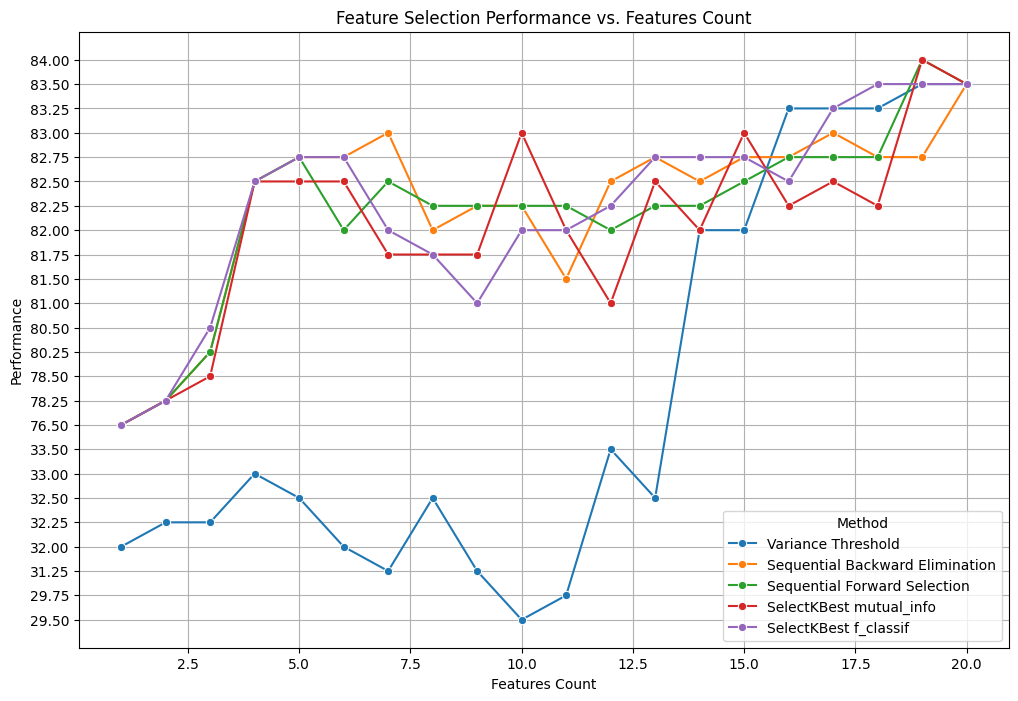

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Melting the DataFrame to reshape it
df_melted = df2.melt(id_vars='Features Count', var_name='Method', value_name='Performance')

# Sorting the melted DataFrame by 'Features Count' and 'Performance'
df_melted_sorted = df_melted.sort_values(by=['Performance'])

# Creating a lineplot using the sorted melted DataFrame
sns.lineplot(x='Features Count', y='Performance', hue='Method', data=df_melted_sorted, marker='o')

plt.xlabel('Features Count')
plt.ylabel('Performance')
plt.title('Feature Selection Performance vs. Features Count')
plt.gca().invert_yaxis()  # Invert the y-axis to display in ascending order
plt.legend(title='Method', loc='lower right')
plt.grid(True)
plt.show()